# Importing Libraries


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score,RocCurveDisplay

# Importing Dataset


In [4]:
wine_data = pd.read_csv("winequality-red.csv")

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploring Dataset

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

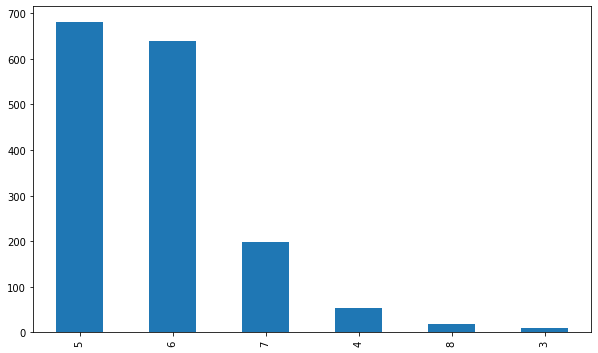

In [9]:
wine_data.quality.value_counts().plot(kind="bar", figsize=(10,6));

In [10]:
pd.crosstab(wine_data.quality,wine_data.pH)

pH,2.74,2.86,2.87,2.88,2.89,2.90,2.92,2.93,2.94,2.95,...,3.69,3.70,3.71,3.72,3.74,3.75,3.78,3.85,3.90,4.01
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,1,2,0,3,1,2,0,...,2,0,0,2,1,0,0,0,0,0
6,0,1,1,0,2,1,0,2,2,0,...,2,1,1,0,0,0,1,1,1,2
7,0,0,0,0,0,0,1,0,0,1,...,0,0,3,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine_data.alcohol.value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

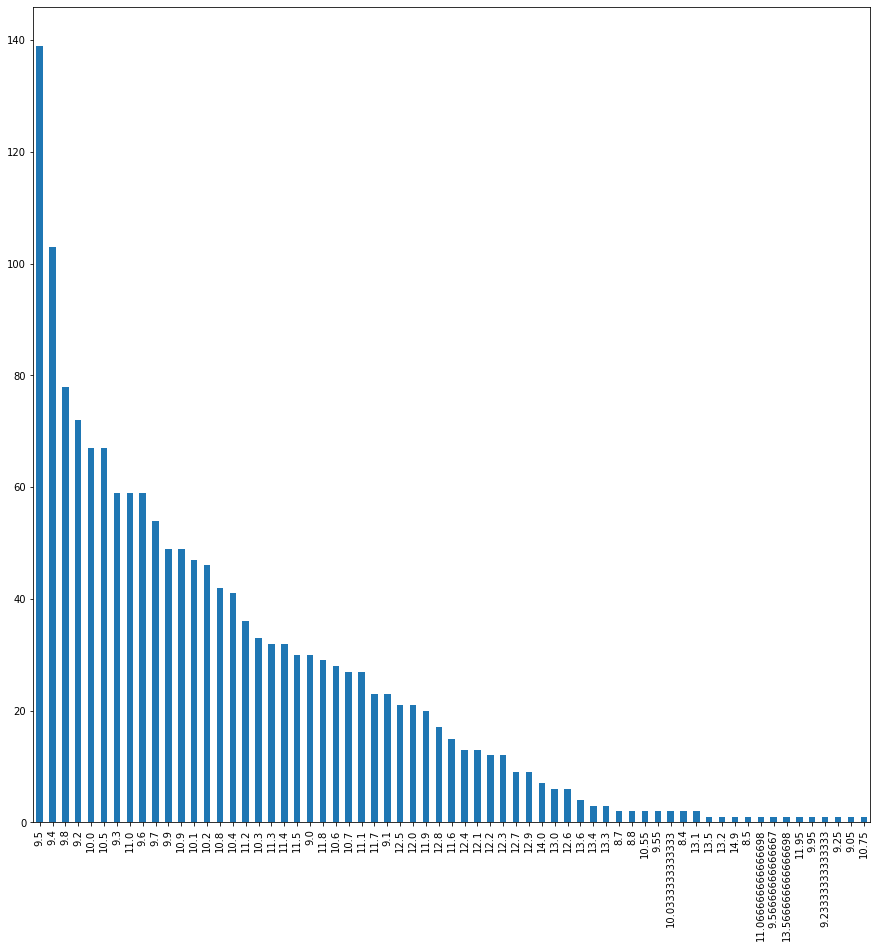

In [13]:
wine_data.alcohol.value_counts().plot(kind="bar",figsize=(15,15));

In [14]:
pd.crosstab(wine_data.quality,wine_data.alcohol)

alcohol,8.400000,8.500000,8.700000,8.800000,9.000000,9.050000,9.100000,9.200000,9.233333,9.250000,...,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.566667,13.600000,14.000000,14.900000
quality,,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,2,3,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,2,11,0,14,50,0,0,...,4,0,0,0,0,0,0,0,0,1
6,1,0,2,0,16,0,7,17,1,1,...,0,0,1,2,1,1,0,1,4,0
7,0,0,0,0,0,0,0,2,0,0,...,2,0,0,1,1,0,1,3,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,2,0


# Dataset Correlation

In [15]:
wine_data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

# Visualization of Correlation Matrix

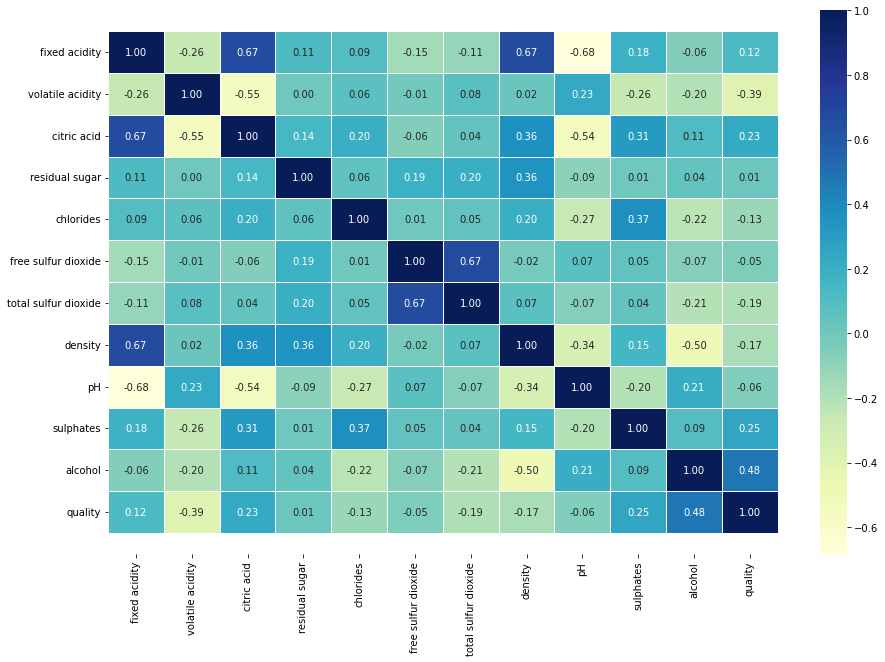

In [16]:
corr_matrix = wine_data.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
                 fmt=".2f",cmap="YlGnBu")

bottom, top = ax.get_ylim()

ax.set_ylim(bottom+0.5,top-0.5);

# Creating Features and Label Data


In [17]:
X = wine_data.drop("quality", axis=1)

y = wine_data.quality

# Spliting Train and Test Data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)
model.score(x_test, y_test)

0.65625

In [19]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.48125

In [20]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.634375

# Data Models Training and Models Score Storing


In [21]:
models ={"Random Forest": RandomForestClassifier(),
         "KNC": KNeighborsClassifier(),
         "Decision Tree": DecisionTreeClassifier()
        }

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_score = {}
    
    for name,model in models.items():
        
        model.fit(x_train, y_train)
        
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [22]:
model_scores = fit_and_score(models = models, x_train = x_train,
                             x_test = x_test, y_train = y_train,
                             y_test = y_test
                            )

model_scores

{'Random Forest': 0.665625, 'KNC': 0.48125, 'Decision Tree': 0.628125}

# Visualization of Data Models Accuracy

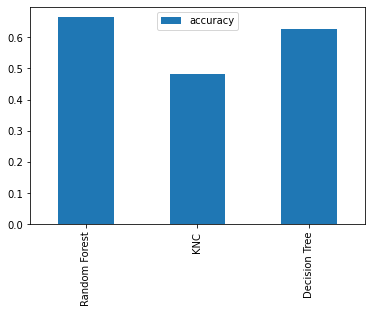

In [23]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

model_compare.T.plot.bar();

# Tuning Hyperparameters of K-Nearest-Neighbors Classifier


In [24]:
knn_train_scores = []
knn_test_scores = []

neighbors = range(1, 21)

knn =  KNeighborsClassifier()

for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train, y_train)
    
    knn_train_scores.append(knn.score(x_train, y_train))
    
    knn_test_scores.append(knn.score(x_test, y_test))

In [25]:
knn_train_scores

[1.0,
 0.7896794370602033,
 0.745113369820172,
 0.6974198592650508,
 0.6637998436278343,
 0.6458170445660673,
 0.6231430805316653,
 0.6137607505863957,
 0.6059421422986708,
 0.5942142298670836,
 0.5910867865519938,
 0.5863956215793589,
 0.5918686473807663,
 0.5801407349491791,
 0.584831899921814,
 0.5856137607505864,
 0.5629397967161845,
 0.565285379202502,
 0.5684128225175918,
 0.565285379202502]

In [26]:
knn_test_scores

[0.578125,
 0.50625,
 0.471875,
 0.48125,
 0.48125,
 0.5125,
 0.48125,
 0.490625,
 0.48125,
 0.478125,
 0.484375,
 0.49375,
 0.50625,
 0.49375,
 0.496875,
 0.503125,
 0.503125,
 0.51875,
 0.51875,
 0.521875]

# Visualization of KNN Train and Test Data


Maximum KNN score on the test data 57.81%


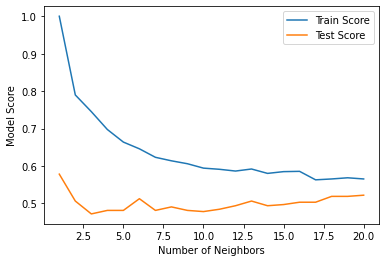

In [27]:
plt.plot(neighbors, knn_train_scores, label="Train Score")
plt.plot(neighbors, knn_test_scores, label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data {max(knn_test_scores)*100:.2f}%")

# Tuning Hyperparameters of RandomForestClassifier


In [28]:
rf_train_scores = []
rf_test_scores = []

Random_Forest = range(1, 21)

Random_F =  RandomForestClassifier()

for i in Random_Forest:
    
    Random_F.set_params(n_estimators=i)
    
    Random_F.fit(x_train, y_train)
    
    rf_train_scores.append(Random_F.score(x_train, y_train))
    
    rf_test_scores.append(Random_F.score(x_test, y_test))

In [29]:
rf_train_scores

[0.8428459734167318,
 0.8444096950742768,
 0.9272869429241595,
 0.9327599687255669,
 0.9609069585613761,
 0.9671618451915559,
 0.9734167318217357,
 0.980453479280688,
 0.9890539483971853,
 0.9867083659108679,
 0.9882720875684128,
 0.9882720875684128,
 0.9929632525410477,
 0.9913995308835027,
 0.99687255668491,
 0.9921813917122753,
 0.99687255668491,
 0.9945269741985927,
 0.9937451133698202,
 0.9945269741985927]

In [30]:
rf_test_scores

[0.540625,
 0.528125,
 0.575,
 0.5625,
 0.653125,
 0.63125,
 0.6125,
 0.621875,
 0.63125,
 0.634375,
 0.640625,
 0.64375,
 0.653125,
 0.675,
 0.675,
 0.634375,
 0.634375,
 0.646875,
 0.6625,
 0.675]

# Visualization of RandomForestClassifier Train and Test Data

Maximum KNN score on the test data 67.50%


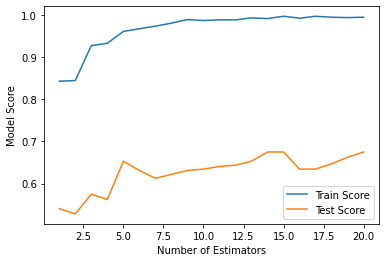

In [31]:
plt.plot(Random_Forest, rf_train_scores, label="Train Score")
plt.plot(Random_Forest, rf_test_scores, label = "Test Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data {max(rf_test_scores)*100:.2f}%")

# Tuning Hyperparameters of RandomForestClassifier Using Randomized Search

In [32]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None,3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [33]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
rs_rf.score(x_test, y_test)

0.659375

# Evaluation Function

In [36]:
def data_model_evaluation(model,x_train, x_test, y_train, y_test):
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    score = {"Accuracy": accuracy_score(y_test,y_pred)*100,
             "Precision": precision_score(y_test,y_pred,average='macro',zero_division=1)*100,
             "Recall": recall_score(y_test,y_pred,average='macro')*100,
             "F1 ": f1_score(y_test,y_pred,average='macro')*100
            }
    
    return score

# Evaluation of RandomForestClassifier

In [37]:
res = data_model_evaluation(RandomForestClassifier(),x_train, x_test, y_train, y_test)

res

{'Accuracy': 67.1875,
 'Precision': 66.06567774309039,
 'Recall': 37.141199053613676,
 'F1 ': 39.914326859938505}

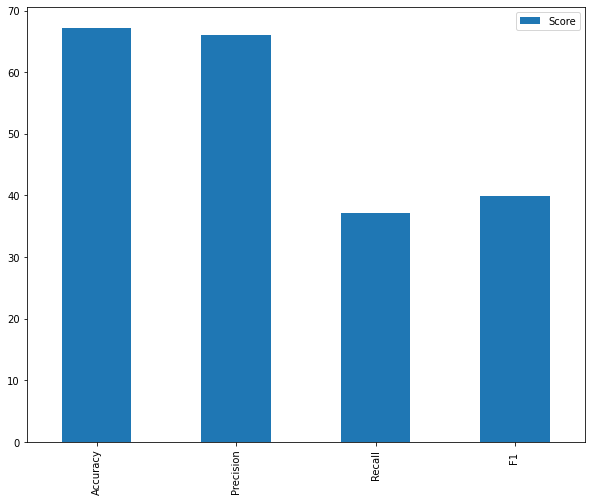

In [38]:
rfc_res = pd.DataFrame(res,index=["Score"])

rfc_res.T.plot.bar(figsize=(10,8));

# Evaluation of KNeighborsClassifier

In [39]:
res = data_model_evaluation(KNeighborsClassifier(),x_train, x_test, y_train, y_test)

res

{'Accuracy': 48.125,
 'Precision': 54.3064696519981,
 'Recall': 21.772465514932367,
 'F1 ': 21.103503366427027}

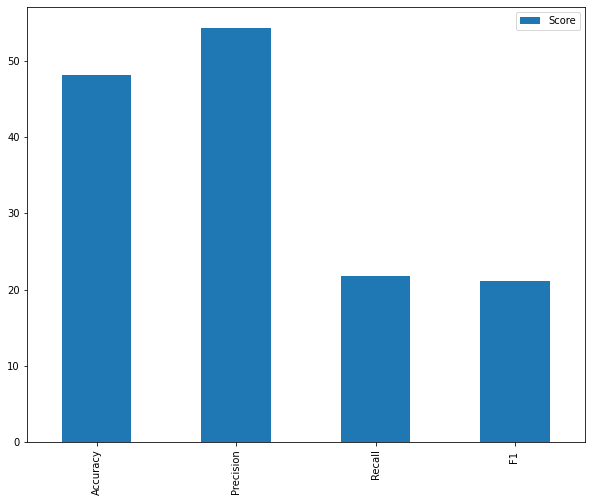

In [40]:
knc_res = pd.DataFrame(res,index=["Score"])

knc_res.T.plot.bar(figsize=(10,8));

# Evaluation of DecisionTreeClassifier

In [41]:
res = data_model_evaluation(DecisionTreeClassifier(),x_train, x_test, y_train, y_test)

res

{'Accuracy': 60.62499999999999,
 'Precision': 34.294365934990935,
 'Recall': 36.02629346904156,
 'F1 ': 35.0308598483781}

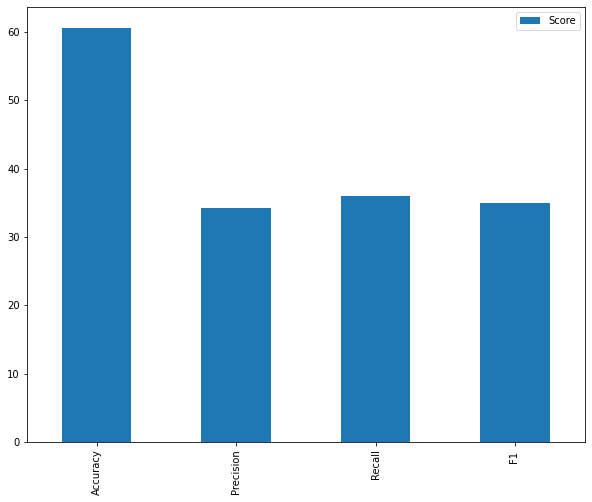

In [42]:
dtc_res = pd.DataFrame(res,index=["Score"])

dtc_res.T.plot.bar(figsize=(10,8));